In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 图像直方图
图像直方图是用一表示数字图像中亮度分布的直方图，
标绘了图像中每个亮度值的像素数可以借助观察该方图了解需要如何调整亮度分布的直方图。

这种直方图中，横坐标的左侧为纯黑、较暗的区域，而右侧为较亮、纯白的区域。

因此，一张较暗图片的图像直方图中的数据多集中于左侧和中间部分，而整体明亮、只有少量阴影的图像则相反。
+ 横坐标:图像中各个像素点的灰度级
+ 纵坐标:具有该灰度级的像素个数.
+ dims: 需要统计的特征的数目，dims=1,表示仅统计灰度值
+ bins：每个特征空间子区段的数目

+ calcHist(imgs, channels指定通道用[0]表示，mask只统计某一部分的直方图时，histSize:bin的数量，ranges：像素值范围，accumulate累积标志)

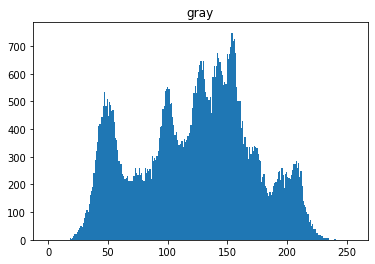

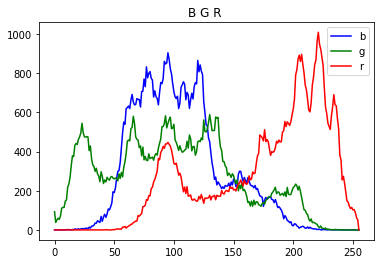

In [31]:
img = cv2.imread('lena.jpg')

# 绘制直方图
# 注意中括号
# hist = cv2.calcHist([img],[0],None,[256],(0,255))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(gray.ravel(), bins=256, range=(0,255))
plt.title('gray')
plt.show()
# 或者
hist_b = cv2.calcHist([img],[0],None,[256],(0,255))
hist_g = cv2.calcHist([img],[1],None,[256],(0,255))
hist_r = cv2.calcHist([img],[2],None,[256],(0,255))
plt.plot(hist_b, color='b', label='b')
plt.plot(hist_g, color='g', label='g')
plt.plot(hist_r, color='r', label='r')
plt.title('B G R ')
plt.legend()
plt.show()

### 使用掩膜的直方图

掩膜：想要显示的区域是纯白的，不显示的区域是纯黑的

如何生成掩膜：
1. 先生成和原始图像一样大小的全黑图像mask=np.zeros(size,np.uint8)
2. 将想要的区域通过索引设置为255，如mask[10:200,200:300]=255
3. 也可以使用轮廓掩膜，比较复杂

(263, 263) (263, 263)


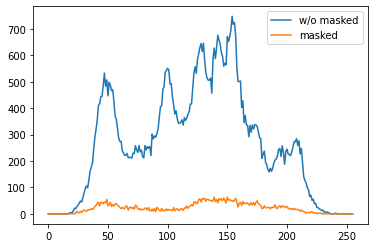

In [44]:
img = cv2.imread('lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mask = np.zeros(gray.shape, np.uint8)
# 左上(115， 107) 右下（180，195）
mask[115:180,107:195] = 255
print(gray.shape, mask.shape)
roi = cv2.bitwise_and(gray,mask)
cv2.imshow('roi', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

hist_gray_mask = cv2.calcHist([gray],[0],mask,[256],(0,255))
hist_gray = cv2.calcHist([gray],[0],None,[256],(0,255))
plt.plot(hist_gray, label='w/o masked')
plt.plot(hist_gray_mask, label='masked')
plt.legend()
plt.show()

### 直方图均衡化
+ cv2.equalizeHist(scr[,dst])

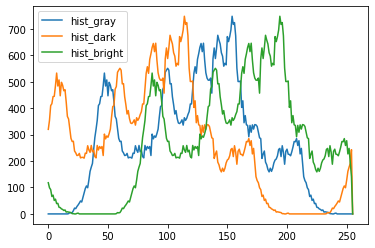

In [45]:
lena = cv2.imread('lena.jpg')
gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

# lena变黑
gray_dark = gray - 40
# lena变量
gray_bright = gray + 40

# 查看各自的直方图
hist_gray = cv2.calcHist([gray],[0],None,[256],(0,255))
hist_dark = cv2.calcHist([gray_dark],[0],None,[256],(0,255))
hist_bright = cv2.calcHist([gray_bright],[0],None,[256],(0,255))

plt.plot(hist_gray, label='hist_gray')
plt.plot(hist_dark, label='hist_dark')
plt.plot(hist_bright, label='hist_bright')
plt.legend()

cv2.imshow('img img_datk, img_bright', np.hstack((gray, gray_dark, gray_bright)))
cv2.waitKey(0)
cv2.destroyAllWindows()

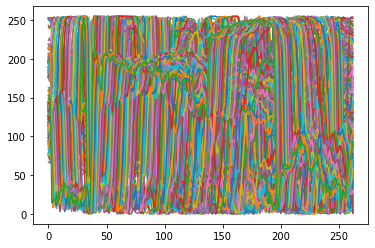

In [20]:
hist_equal = cv2.equalizeHist(gray)
plt.plot(hist_equal)
cv2.imshow('hist_equal', hist_equal)
cv2.waitKey(0)
cv2.destroyAllWindows()